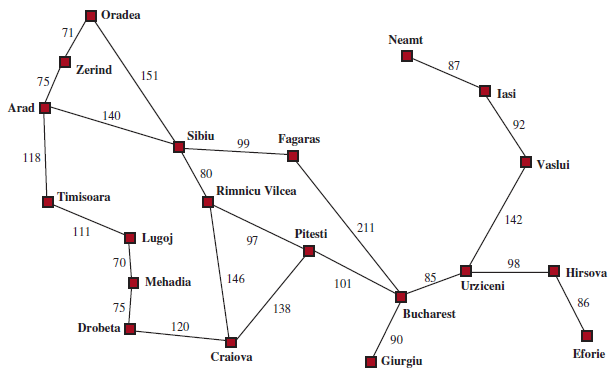

**Figure 3.1** A simplified road map of part of Romania, with road distances in miles.

In [ ]:
romanian_map = {
    'Arad': {'Sibiu':140, 'Zerind':75, 'Timisoara':118},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu': 151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu':80},
    'Timisoara': {'Arad': 118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj': 70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
    'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Pitesti': {'Rimnicu': 97, 'Craiova':138, 'Bucharest':101},
    'Bucharest': {'Fagaras':211, 'Pitesti': 101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Vaslui':142, 'Hirsova':98},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Iasi': 92, 'Urziceni':142},
    'Iasi': {'Vaslui':92, 'Neamt': 87},
    'Neamt': {'Iasi':87}
}

In [ ]:
romanian_map['Zerind']

{'Arad': 75, 'Oradea': 71}

In [ ]:
romanian_map['Iasi']

{'Vaslui': 92, 'Neamt': 87}

In [ ]:
list(romanian_map['Arad'].keys())

['Sibiu', 'Zerind', 'Timisoara']

In [ ]:
romanian_map['Arad']['Timisoara']

118

In [ ]:
romanian_map['Zerind']['Arad']

75

# BFS

<p style="text-align: justify">Reached is a set of states which has been generated, because once we’ve reached a state, we can never find a better path to the state. That also means we can do an early goal test, checking whether a node is a solution as soon as it is generated, rather than the late goal test that best-first search uses, waiting until a node is popped off the queue.</p>

BFS simulation for a path from Arad to Bucharest <br>
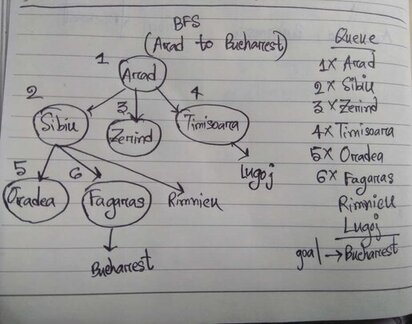

In [ ]:
def bfs(start, goal, G):
    generated= [start] # to store the order of nodes generated
    frontier = [{'Name':start,'Path cost':0, 'Path':[start]}]

    while len(frontier) > 0:
        print('\n***Frontier', end=': ')
        for node in frontier: print(node['Name'], end = ' - ')
        unode  = frontier.pop(0)     # selceting the node to expand
        u = unode['Name']

        print('***')
        print("Expanding: "+u)

        # expand u
        for v in G[u].keys(): # ['Sibiu', 'Zerind', 'Timisoara']
            if v not in generated: # process if v is not expanded yet
                generated.append(v)
                print(v+" generated.")
                cost = unode['Path cost'] + G[u][v]
                path =  unode['Path']+ [v]
                vnode = {'Name': v,'Path cost': cost,'Path': path}
                # goal test
                if v == goal:
                    print('Goal test satisfied.')
                    return vnode # breaking from while
                frontier.append(vnode)# store the generated node in the frontier

    print('Failed')

In [ ]:
bfs('Arad', 'Bucharest', romanian_map)


***Frontier: Arad - ***
Expanding: Arad
Sibiu generated.
Zerind generated.
Timisoara generated.

***Frontier: Sibiu - Zerind - Timisoara - ***
Expanding: Sibiu
Oradea generated.
Fagaras generated.
Rimnicu generated.

***Frontier: Zerind - Timisoara - Oradea - Fagaras - Rimnicu - ***
Expanding: Zerind

***Frontier: Timisoara - Oradea - Fagaras - Rimnicu - ***
Expanding: Timisoara
Lugoj generated.

***Frontier: Oradea - Fagaras - Rimnicu - Lugoj - ***
Expanding: Oradea

***Frontier: Fagaras - Rimnicu - Lugoj - ***
Expanding: Fagaras
Bucharest generated.
Goal test satisfied.


{'Name': 'Bucharest',
 'Path cost': 450,
 'Path': ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']}

In [ ]:
bfs('Oradea', 'Eforie', romanian_map)


***Frontier: Oradea - ***
Expanding: Oradea
Zerind generated.
Sibiu generated.

***Frontier: Zerind - Sibiu - ***
Expanding: Zerind
Arad generated.

***Frontier: Sibiu - Arad - ***
Expanding: Sibiu
Fagaras generated.
Rimnicu generated.

***Frontier: Arad - Fagaras - Rimnicu - ***
Expanding: Arad
Timisoara generated.

***Frontier: Fagaras - Rimnicu - Timisoara - ***
Expanding: Fagaras
Bucharest generated.

***Frontier: Rimnicu - Timisoara - Bucharest - ***
Expanding: Rimnicu
Craiova generated.
Pitesti generated.

***Frontier: Timisoara - Bucharest - Craiova - Pitesti - ***
Expanding: Timisoara
Lugoj generated.

***Frontier: Bucharest - Craiova - Pitesti - Lugoj - ***
Expanding: Bucharest
Giurgiu generated.
Urziceni generated.

***Frontier: Craiova - Pitesti - Lugoj - Giurgiu - Urziceni - ***
Expanding: Craiova
Drobeta generated.

***Frontier: Pitesti - Lugoj - Giurgiu - Urziceni - Drobeta - ***
Expanding: Pitesti

***Frontier: Lugoj - Giurgiu - Urziceni - Drobeta - ***
Expanding: Lugoj

{'Name': 'Eforie',
 'Path cost': 730,
 'Path': ['Oradea',
  'Sibiu',
  'Fagaras',
  'Bucharest',
  'Urziceni',
  'Hirsova',
  'Eforie']}

In [ ]:
bfs('Timisoara', 'Neamt', romanian_map)


***Frontier: Timisoara - ***
Expanding: Timisoara
Arad generated.
Lugoj generated.

***Frontier: Arad - Lugoj - ***
Expanding: Arad
Sibiu generated.
Zerind generated.

***Frontier: Lugoj - Sibiu - Zerind - ***
Expanding: Lugoj
Mehadia generated.

***Frontier: Sibiu - Zerind - Mehadia - ***
Expanding: Sibiu
Oradea generated.
Fagaras generated.
Rimnicu generated.

***Frontier: Zerind - Mehadia - Oradea - Fagaras - Rimnicu - ***
Expanding: Zerind

***Frontier: Mehadia - Oradea - Fagaras - Rimnicu - ***
Expanding: Mehadia
Drobeta generated.

***Frontier: Oradea - Fagaras - Rimnicu - Drobeta - ***
Expanding: Oradea

***Frontier: Fagaras - Rimnicu - Drobeta - ***
Expanding: Fagaras
Bucharest generated.

***Frontier: Rimnicu - Drobeta - Bucharest - ***
Expanding: Rimnicu
Craiova generated.
Pitesti generated.

***Frontier: Drobeta - Bucharest - Craiova - Pitesti - ***
Expanding: Drobeta

***Frontier: Bucharest - Craiova - Pitesti - ***
Expanding: Bucharest
Giurgiu generated.
Urziceni generate

{'Name': 'Neamt',
 'Path cost': 974,
 'Path': ['Timisoara',
  'Arad',
  'Sibiu',
  'Fagaras',
  'Bucharest',
  'Urziceni',
  'Vaslui',
  'Iasi',
  'Neamt']}

In [ ]:
bfs('Neamt', 'Moscow', romanian_map)


***Frontier: Neamt - ***
Expanding: Neamt
Iasi generated.

***Frontier: Iasi - ***
Expanding: Iasi
Vaslui generated.

***Frontier: Vaslui - ***
Expanding: Vaslui
Urziceni generated.

***Frontier: Urziceni - ***
Expanding: Urziceni
Bucharest generated.
Hirsova generated.

***Frontier: Bucharest - Hirsova - ***
Expanding: Bucharest
Fagaras generated.
Pitesti generated.
Giurgiu generated.

***Frontier: Hirsova - Fagaras - Pitesti - Giurgiu - ***
Expanding: Hirsova
Eforie generated.

***Frontier: Fagaras - Pitesti - Giurgiu - Eforie - ***
Expanding: Fagaras
Sibiu generated.

***Frontier: Pitesti - Giurgiu - Eforie - Sibiu - ***
Expanding: Pitesti
Rimnicu generated.
Craiova generated.

***Frontier: Giurgiu - Eforie - Sibiu - Rimnicu - Craiova - ***
Expanding: Giurgiu

***Frontier: Eforie - Sibiu - Rimnicu - Craiova - ***
Expanding: Eforie

***Frontier: Sibiu - Rimnicu - Craiova - ***
Expanding: Sibiu
Arad generated.
Oradea generated.

***Frontier: Rimnicu - Craiova - Arad - Oradea - ***
Ex

Based on the above BFS simulation, draw the search tree on paper and insert the image in this cell. (Double Click to edit this cell)

# DFS
Implement DFS using stack,
Implement stack using list (append and pop)

DFS simulation for a path from Arad to Bucharest <br>
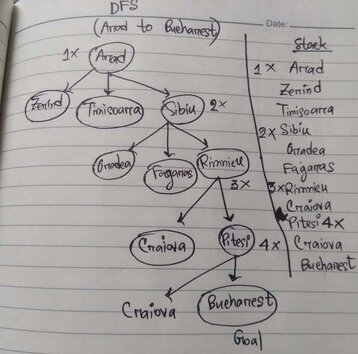

In [ ]:
romanianMap = {
    'Arad': {'Zerind':75, 'Timisoara':118, 'Sibiu':140},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu': 151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu':80},
    'Timisoara': {'Arad': 118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj': 70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
    'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Pitesti': {'Rimnicu': 97, 'Craiova':138, 'Bucharest':101},
    'Bucharest': {'Fagaras':211, 'Pitesti': 101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Vaslui':142, 'Hirsova':98},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Iasi': 92, 'Urziceni':142},
    'Iasi': {'Vaslui':92, 'Neamt': 87},
    'Neamt': {'Iasi':87}
}

In [ ]:
def dfs(start, goal, G):
    expanded= []
    frontier = [{'Name':start,'Path cost':0, 'Path':[start]}]

    while len(frontier) > 0:

        print('\n***Frontier', end=': ')
        for node in frontier: print(node['Name'], end = ' - ')
        unode  = frontier.pop()
        u = unode['Name']

        if u == goal:
            print('Goal is reached;.')
            if unode is None:
                return {'Name': u,'Path cost': unode['Path cost'],'Path': str(u) + ''}
            else:
                unode = {'Name': v,'Path cost': cost,'Path': path}
                return unode

            return "found"

        else:
            print('***')
            print("Expanding: "+u)

            for v in G[u].keys():
                if v not in expanded:
                    print(v+" generated.")
                    cost = unode['Path cost'] + G[u][v]
                    path =  unode['Path']+ [v]
                    vnode = {'Name': v,'Path cost': cost,'Path': path}
                    frontier.append(vnode)

            expanded.append(u)

    print('Failed')

In [ ]:
dfs('Arad', 'Bucharest', romanian_map)


***Frontier: Arad - ***
Expanding: Arad
Sibiu generated.
Zerind generated.
Timisoara generated.

***Frontier: Sibiu - Zerind - Timisoara - ***
Expanding: Timisoara
Lugoj generated.

***Frontier: Sibiu - Zerind - Lugoj - ***
Expanding: Lugoj
Mehadia generated.

***Frontier: Sibiu - Zerind - Mehadia - ***
Expanding: Mehadia
Drobeta generated.

***Frontier: Sibiu - Zerind - Drobeta - ***
Expanding: Drobeta
Craiova generated.

***Frontier: Sibiu - Zerind - Craiova - ***
Expanding: Craiova
Rimnicu generated.
Pitesti generated.

***Frontier: Sibiu - Zerind - Rimnicu - Pitesti - ***
Expanding: Pitesti
Rimnicu generated.
Bucharest generated.

***Frontier: Sibiu - Zerind - Rimnicu - Rimnicu - Bucharest - Goal is reached;.


{'Name': 'Bucharest',
 'Path cost': 733,
 'Path': ['Arad',
  'Timisoara',
  'Lugoj',
  'Mehadia',
  'Drobeta',
  'Craiova',
  'Pitesti',
  'Bucharest']}

In [ ]:
dfs('Arad', 'Zerind', romanianMap)


***Frontier: Arad - ***
Expanding: Arad
Zerind generated.
Timisoara generated.
Sibiu generated.

***Frontier: Zerind - Timisoara - Sibiu - ***
Expanding: Sibiu
Oradea generated.
Fagaras generated.
Rimnicu generated.

***Frontier: Zerind - Timisoara - Oradea - Fagaras - Rimnicu - ***
Expanding: Rimnicu
Craiova generated.
Pitesti generated.

***Frontier: Zerind - Timisoara - Oradea - Fagaras - Craiova - Pitesti - ***
Expanding: Pitesti
Craiova generated.
Bucharest generated.

***Frontier: Zerind - Timisoara - Oradea - Fagaras - Craiova - Craiova - Bucharest - ***
Expanding: Bucharest
Fagaras generated.
Giurgiu generated.
Urziceni generated.

***Frontier: Zerind - Timisoara - Oradea - Fagaras - Craiova - Craiova - Fagaras - Giurgiu - Urziceni - ***
Expanding: Urziceni
Vaslui generated.
Hirsova generated.

***Frontier: Zerind - Timisoara - Oradea - Fagaras - Craiova - Craiova - Fagaras - Giurgiu - Vaslui - Hirsova - ***
Expanding: Hirsova
Eforie generated.

***Frontier: Zerind - Timisoara

{'Name': 'Sibiu',
 'Path cost': 362,
 'Path': ['Arad', 'Sibiu', 'Oradea', 'Zerind']}

Based on the above DFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

# Another Example

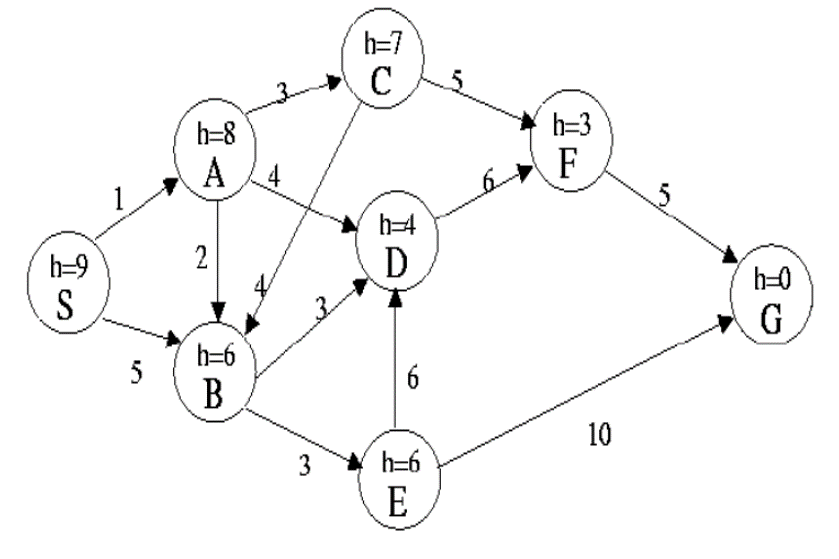

In the above graph the start state is **S**, and the goal state is **G**. The transition costs are next to the edges, and the heuristic estimate, h, of the distance from the state to the goal is in the state’s node.
<br>
Use **BFS** and  **DFS** for this graph.

In [ ]:
directedGraph = {
    'S': {'A':1, 'B':5},
    'A': {'B':2, 'C':3, 'D':4},
    'B': {'D':3, 'E': 3},
    'C': {'B':4, 'F':5},
    'D': {'F': 6},
    'E': {'D':6, 'G':10},
    'F': {'G': 5},
    'G': {}
}

In [ ]:
list(directedGraph['S'].keys())

['A', 'B']

In [ ]:
bfs('S', 'G', directedGraph)


***Frontier: S - ***
Expanding: S
A generated.
B generated.

***Frontier: A - B - ***
Expanding: A
C generated.
D generated.

***Frontier: B - C - D - ***
Expanding: B
E generated.

***Frontier: C - D - E - ***
Expanding: C
F generated.

***Frontier: D - E - F - ***
Expanding: D

***Frontier: E - F - ***
Expanding: E
G generated.
Goal test satisfied.


{'Name': 'G', 'Path cost': 18, 'Path': ['S', 'B', 'E', 'G']}

BFS simulation for the above graph <br>
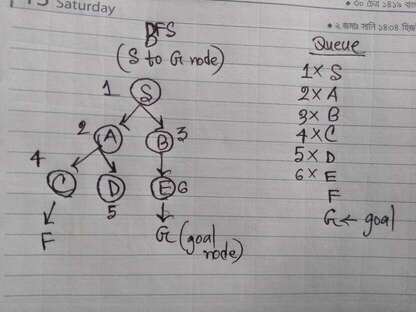

In [44]:
dfs('S', 'G', directedGraph)


***Frontier: S - ***
Expanding: S
A generated.
B generated.

***Frontier: A - B - ***
Expanding: B
D generated.
E generated.

***Frontier: A - D - E - ***
Expanding: E
D generated.
G generated.

***Frontier: A - D - D - G - Goal is reached;.


{'Name': 'G', 'Path cost': 18, 'Path': ['S', 'B', 'E', 'G']}

DFS simulation (From node S -> G) for the given graph <br>
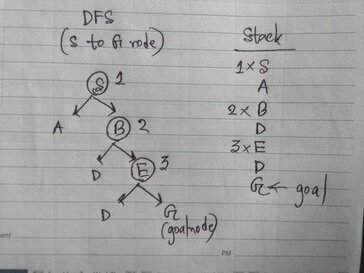